In [1]:
%load_ext autoreload
%autoreload 2
from common import *

In [2]:
RESULT_JSON = "/Users/law/repos/viper/results/all_ops/all_ops_viper_versions.json"

In [3]:
FIXTURES = [VIPER, VIPER_DRAM, VIPER_PMEM, VIPER_UNALIGNED]
BM_TYPES = ['insert', 'get']

BMS = get_all_runs(RESULT_JSON)

RUNS = defaultdict(list)

for bm in BMS:
    if 'median' not in bm['name']: continue
    for (fixture, _) in FIXTURES:
        bm_type = get_bm_type(bm['name'])
        if fixture in bm['name']:
            RUNS[bm_type].append((fixture, bm))
            break
        
for _, run in RUNS.items():
    run.sort(key=lambda x: x[0], reverse=True) 

# pprint(RUNS)

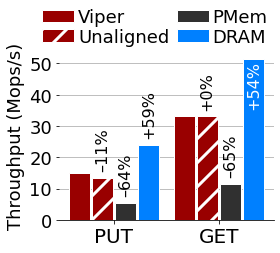

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

# Set position of bar on X axis
bar_width = 0.20
bar_diff = 0.02
r1 = np.arange(3)
r2 = [x + bar_width + bar_diff for x in r1]
r3 = [x + bar_width + bar_diff for x in r2]
r4 = [x + bar_width + bar_diff for x in r3]

Rs = [r1, r2, r3, r4]

plt.rcParams['hatch.linewidth'] = 3

viper_insert = RUNS['insert'][0][1]['items_per_second'] / MILLION
viper_get    = RUNS['get'][0][1]['items_per_second'] / MILLION

for i, (f, bm) in enumerate(RUNS['insert']):
    color = STYLES[f].color
    hatch = '/' if f == VIPER_UNALIGNED[0] else ''
    x_pos = Rs[i][0]
    tp = bm['items_per_second'] / MILLION
    ax.bar(x_pos, tp, bar_width, label=f, color=color, 
           hatch=hatch, edgecolor='white')
    diff = int(((tp - viper_insert) / viper_insert) * 100)
    if (diff != 0):
        diff_str = f"{'+' if diff > 0 else '–'}{abs(diff)}%"
        ax.text(x_pos, tp + 2, diff_str, rotation=90, fontsize=16, 
                va='bottom', ha='center')

for i, (f, bm) in enumerate(RUNS['get']):
    color = STYLES[f].color
    hatch = '/' if f == VIPER_UNALIGNED[0] else ''
    x_pos = Rs[i][1]
    tp = bm['items_per_second'] / MILLION
    ax.bar(x_pos, tp, bar_width, label=f, color=color, 
           hatch=hatch, edgecolor='white')
    diff = int(((tp - viper_get) / viper_get) * 100)
    if (f != VIPER[0]):
        diff_str = f"{'+' if diff >= 0 else '–'}{abs(diff)}%"
        y_pos = tp + 2
        c = 'black'
        if f == VIPER_DRAM[0]: 
            y_pos = tp - 16
            c= 'white'
        ax.text(x_pos, y_pos, diff_str, rotation=90, fontsize=16, 
                va='bottom', ha='center', color=c)


# ax.set_xticks([r + (1.5 * bar_width) for r in range(2)])
ax.set_xticks([(r2[0] + r3[0]) / 2, (r2[1] + r3[1]) / 2])
ax.set_axisbelow(True)
ax.grid(axis='y', which='major')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)


ax.set_ylabel("Throughput (Mops/s)", fontsize=18)
ax.set_xticklabels(['PUT', 'GET'], fontsize=20)

fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.2), 
           labels=['Viper', 'Unaligned', 'PMem', 'DRAM'],
           ncol=2, frameon=False, fontsize=18, 
           columnspacing=0.4, handletextpad=0.2, borderpad=0.1, 
           labelspacing=0.1, handlelength=1.8)

hide_border(ax)
plt.tight_layout()
fig.savefig('charts/viper_versions.pdf', bbox_inches='tight')
fig.savefig('charts/viper_versions.svg', bbox_inches='tight')